# Lösungen SciPy

In [2]:
from scipy import stats
import matplotlib.pyplot as plt

### Aufgabe

*7 Punkte*

Bestimme mittels Linearer Regression die *best fit* Funktion für die beiden gegebenen Datensets `x_data` & `y_data`, unter beachtung folgender Punkte:

- Plotte das Ergebnis angemessen
- Nutze SciPys `linregress` Funktion, speichere den Output vor dem entpacken in der Variablen `l`
- Definiere die Funktion `reg_line` mit einem Eingabeparameter
- Bestimme die Werte für `-0.3` & `3.4` speichere diese als liste in variablen `future`

In [3]:
import numpy as np
random = np.random.default_rng(420)

# 2 scuffed up One-Liners :)
x_data: np.array = np.sort(np.round(random.random(40)*np.pi, decimals=2))
y_data: np.array = np.flip(np.sort(np.round(random.random(40)*np.sqrt(2), decimals=2)))

In [9]:
l = stats.linregress(x_data,y_data)
slope, intercept, _, _, stderr = l

def reg_line(x: float) -> float:
    return float(np.round(slope*x+intercept,decimals=2))

ext: tuple = (-0.3, 3.4)
rl: np.array = np.vectorize(reg_line)(ext)

future: list = [reg_line(ext[0]), reg_line(ext[1])]

Text(0, 0.5, 'Y')

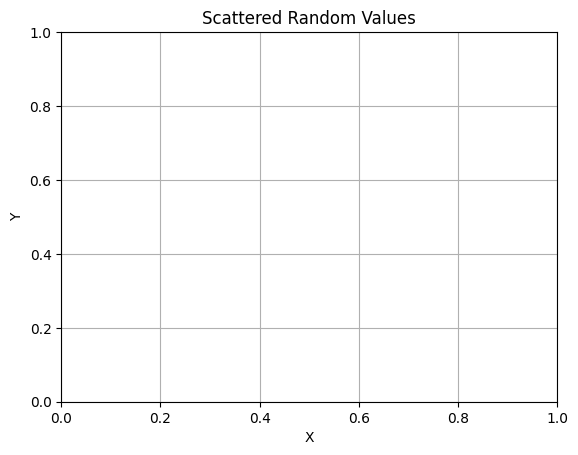

In [10]:
plt.title("Scattered Random Values")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")

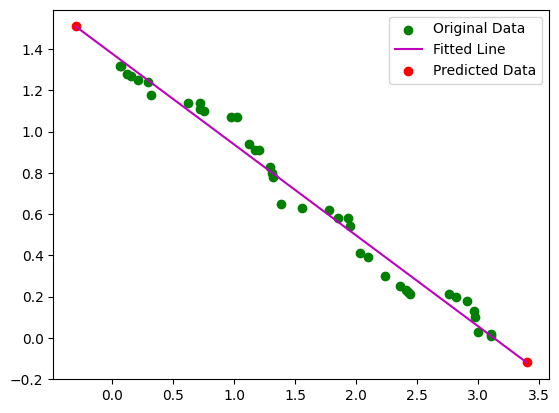

In [13]:
plt.scatter(x_data,y_data, color='g', label="Original Data")
plt.plot(ext, rl, color='m', label="Fitted Line")
plt.scatter(ext, future, color='r', label="Predicted Data")
plt.legend()
plt.show()

### Aufgabe 

*6 Punkte*

Gegeben sind die nach Altersgruppe aufgeschlüsselten Durschnittskörpergrößen (in cm) von Frauen in Deutschland. (Zu finden beim [Statistischen Bundesamt](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Gesundheit/Gesundheitszustand-Relevantes-Verhalten/Tabellen/koerpermasse-frauen.html))

Gehe wie folgt vor:

- Berechne das arithmetische Mittel nutze dafür NumPy. und speichere das Ergebnis mit einer Genauigkeit von 1 Dezimalstelle nach dem Komma in der Variablen `avg_height`.
- Gegeben ist auch die Standardabweichung von 15cm, stelle die Normalverteilung mittels `norm.pdf` auf. Speichere den Wert in `norm_height` und finde einen geeigneten linespace zum plotten.
- Berechne folgend die Körpergröße unter die 80% aller Frauen (nach Datenset) fallen. Speichere den Wert in der Variablen `avg_percentile`.
- Plotte das Ergebnis. Orientiere dich gerne an dem Bienenbeispiel. Finde eine geeignete Darstellung. *Tipp: Da die Y-Achse in diesem Beispiel keinen Sinn ergibt kannst du sie einfach austellen mit `plt.yticks([])`*

In [14]:
# Given
avg_height_per_woman = {
    "18 - 20": 167.6,
    "20 - 25": 167.7,
    "25 - 30": 167.3,
    "30 - 35": 167.2,
    "35 - 40": 167.3,
    "40 - 45": 167.5,
    "45 - 50": 167.1,
    "50 - 55": 167.1,
    "55 - 60": 166.9,
    "60 - 65": 165.4,
    "65 - 70": 164.5,
    "70 - 75": 163.9,
    "75+": 162.8
}

avg_height = None
norm_height = None
avg_percentile = None

In [19]:
avg_height = np.round(
        np.mean(list(avg_height_per_woman.values()))
        , decimals=1)
std_sigma = 15

norm_x = np.linspace(120, 220, 1000)
norm_height = stats.norm(avg_height, std_sigma).pdf(norm_x)

# Height of 80th percentile of woman heights
avg_percentile = stats.norm(avg_height, std_sigma).ppf(0.8)

x_percentile = np.arange(norm_x[0], avg_percentile, 0.01)
y_percentile = stats.norm(avg_height, std_sigma).pdf(x_percentile)

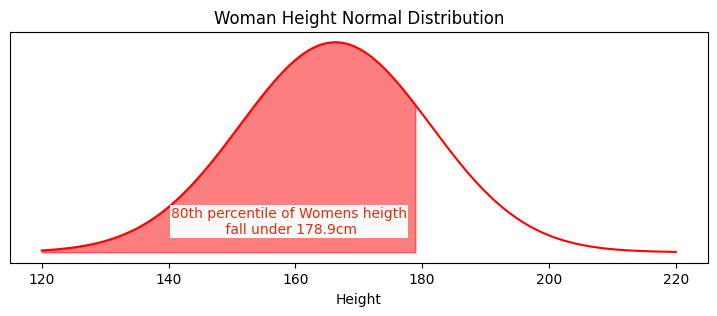

In [32]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(norm_x, norm_height, color='r')
ax.fill_between(x_percentile, y_percentile, 0, alpha=.5, color='#fa0000')
ax.text(0.4,0.18,
f"80th percentile of Womens heigth\n fall under {avg_percentile:.1f}cm",
ha='center', va='center', transform=ax.transAxes,
bbox={'facecolor':'#fafafa','alpha':1,'edgecolor':'none','pad':1},
color='#de2e0b'
)
plt.title("Woman Height Normal Distribution")
plt.xlabel("Height")
plt.yticks([]) # hide y
plt.show()

### Aufgabe

*7 Punkte*

Gegeben sind zwei Würfel aus dem Spiel **Super Mario Party**. Es wird im folgenden angenommen das die Charaktere ihre Würfel würfeln und deren Augenzahl addiert wird.

- Stelle alle Kombinationen der Gegebenen Daten auf, speichere diese als Dictionary in der Variablen `dist_mp`.
- Exthrahiere den am dritt häufigsten Aufkommenden Wert und speicher diesen in der Variablen `best3` als tuple in der Form `(<Augenzahl>, <Auftritte>)`.
- Plotte eine geeignete binomiale Verteilung. *Tipp: schaue dir an wie du den Plot mittels matplotlib vergrößerst*

Einige der Würfel gebem dem Charakter Münzen. Finde eine logische Schlussfolgerung diese mit anderen Werten zu ersetzen. Überlege dabei welche Auswirkungen es auf die Augenzahl hat das der Charakter Münzen bekomment.

|Charakter|Dice|
|-|-|
|Mario|1, 3, 3, 3, 5, 6|
|Peach|0, 2, 4, 4, 4, 6|
|Boo|-2 Coins, -2 Coins, 5, 5, 7, 7|
|Donkey Kong|+5 Coins, 0, 0, 0, 10, 10|

In [25]:
# define dices
mario = [1, 3, 3, 3, 5, 6]
peach = [0, 2, 4, 4, 4, 6]
boo = [0, 0, 5, 5, 7, 7]
dk = [0, 0, 0, 0, 10, 10]

# Create Keys
keys: set = {
    m+p+b+d
    for m in mario for p in peach
    for b in boo for d in dk
}

# Creating a dict with all keys
dist_mp: dict = {k: 0 for k in keys}

# Summing all possible combinations and store them inside the dict
for m in mario:
    for p in peach:
        for b in boo:
            for d in dk:
                dice_roll: int = m+p+b+d
                dist_mp[dice_roll] += 1

best3: tuple = (10, dist_mp[10])

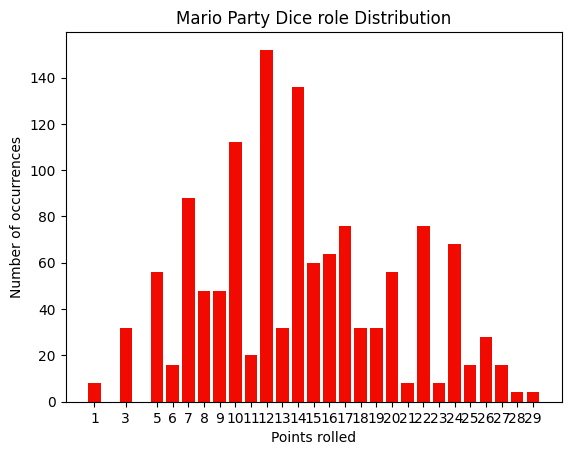

In [26]:
# Plot
plt.bar(dist_mp.keys(), dist_mp.values(), color='#F00a00')
plt.xticks(list(dist_mp.keys()))
plt.title("Mario Party Dice role Distribution")
plt.xlabel("Points rolled")
plt.ylabel("Number of occurrences")
plt.show()